# Capitulo 3 - Autovalores y autovectores

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

Calculamos los autovalores y autovectores de la matriz
$$
A = \begin{pmatrix}
2 & 3 \\
2 & 1
\end{pmatrix}
$$

In [2]:
A = np.array([[2,3],[2,1]])
Id = np.eye(2)
print(Id)

[[1. 0.]
 [0. 1.]]


In [3]:
# Espacio de autovectores del autovalor lambda = -1
scipy.linalg.null_space(A+Id)

array([[-0.70710678],
       [ 0.70710678]])

In [4]:
# Espacio de autovectores del autovalor lambda = 4
scipy.linalg.null_space(A-4*Id)

array([[0.83205029],
       [0.5547002 ]])

In [5]:
# Autovalores y autovectores con el comando eig
np.linalg.eig(A)

(array([ 4., -1.]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))

In [6]:
# Podemos usar también eigvals para los autovalores
np.linalg.eigvals(A)

array([ 4., -1.])

In [7]:
# Matrices de cambios de base para llevar A a la forma diagonal
C_BE = np.array([[1,3],[-1,2]])
print(C_BE)

[[ 1  3]
 [-1  2]]


In [8]:
C_EB = np.linalg.inv(C_BE)
B = C_EB @ A @ C_BE
print(B)

[[-1.00000000e+00 -1.77635684e-15]
 [ 0.00000000e+00  4.00000000e+00]]


## Método de la potencia

Para 
$$
A = \begin{pmatrix}
0.9 & 0.15 & 0.25 \\
0.075 & 0.8 &  0.25 \\
0.025 & 0.05 & 0.5
\end{pmatrix}
$$
y $v = (1, 2, 3)$, calcular $A^k v$ para distintos valores de $k$.

In [9]:
A = np.array([[0.9, 0.15, 0.25], [0.075, 0.8, 5.25], [0.025, 0.05, 0.5]])
v = np.array([-1,20,15])

In [10]:
A @ v

array([ 5.85 , 94.675,  8.475])

In [11]:
A @ A @ v

array([ 21.585 , 120.6725,   9.1175])

In [12]:
def estado(A, v, k):
    for i in range(k):
        v = A @ v
        print(v)
    return(v)

In [13]:
estado(A, v, 50)

[ 5.85  94.675  8.475]
[ 21.585  120.6725   9.1175]
[ 39.80675 146.02375  11.132  ]
[ 60.5126375  178.24750625  13.86235625]
[ 84.66408875 219.91382313  17.35636938]
[113.52384569 273.40180438  21.79047806]
[148.62935129 341.63574175  27.40342539]
[191.86263377 428.32377806  34.49923357]
[245.5497455  538.1696962   43.46237153]
[312.58581826 677.12943841  54.77841421]
[396.59125575 852.73416171  69.06032448]
[ 502.10733555 1074.49837709   87.08165172]
[ 634.84177149 1354.43542337  109.8184281 ]
[ 801.97751487 1707.7082191   138.50202951]
[1012.56150363 2153.45054381  174.68586358]
[1277.99440073 2715.80333162  220.32949657]
[1612.64783455 3425.22210236  277.90477489]
[2034.64256017 4320.12633762  350.52968842]
[2566.8296769  5448.98012634  442.1372251 ]
[3238.02803443 6872.9167586   557.68836079]
[4084.58483498 8669.0494036   703.44071918]
[ 5152.34394181 10934.64716122   887.28745065]
[ 6499.12848448 13792.40264051  1119.18468193]
[ 8197.87220259 17397.07632887  1411.6906851 ]
[10340.

array([3431740.46901201, 7282363.50364818,  590932.95581585])

In [14]:
w = np.array([3.75, 1.875, 0.375])
A @ w

array([3.75 , 3.75 , 0.375])

In [15]:
ev = np.linalg.eigvals(A)
print(ev)

[1.26135826 0.80729364 0.1313481 ]


In [16]:
# Que pasa si cambiamos A por una matriz cualquiera?
A = np.random.rand(3,3)
print(estado(A, v, 50))

[22.64272421 20.46256278 11.10736728]
[37.67930027 43.52565261 23.74776083]
[72.56814856 82.33329218 44.10558732]
[137.68133993 156.89637271  83.80074231]
[261.76373915 298.35765147 159.18831426]
[497.62554124 567.28719512 302.59386805]
[ 946.0543514  1078.52804087  575.24767119]
[1798.58808335 2050.4623631  1093.61885769]
[3419.38748671 3898.24979861 2079.1282065 ]
[6500.7753386  7411.17145046 3952.73545287]
[12358.96396413 14089.7688096   7514.75033368]
[23496.27373697 26786.7991747  14286.68454935]
[44669.99724353 50925.78847363 27161.16415395]
[84924.47282363 96817.68585597 51637.5123769 ]
[161454.36615521 184065.17702041  98170.7809525 ]
[306949.35735992 349935.95506549 186637.6167511 ]
[583557.51060889 665281.58452038 354826.55491557]
[1109431.7679107  1264801.68805337  674579.36013739]
[2109198.87976776 2404580.77797429 1282478.1765389 ]
[4009908.53434672 4571474.54212972 2438186.47664516]
[7623447.27568034 8691069.84499843 4635364.09715078]
[14493335.16395359 16523048.38504613 

In [17]:
# Modificamos el programa anterior, normalizando en norma-2 en cada paso
def estado_normalizado(A, v, k):
    for i in range(k):
        v = A @ v
        v = v / np.linalg.norm(v,2)
        print(v)
    return(v)

In [18]:
estado_normalizado(A, v, 50)

[0.69718351 0.63005499 0.34200272]
[0.60504755 0.69892724 0.38133735]
[0.61352735 0.69608675 0.37289065]
[0.61209732 0.69752262 0.37255746]
[0.61210821 0.6976794  0.37224588]
[0.61206702 0.69774912 0.37218292]
[0.61206035 0.69776567 0.37216286]
[0.61205798 0.69777058 0.37215756]
[0.61205738 0.69777191 0.37215605]
[0.6120572  0.69777228 0.37215564]
[0.61205715 0.69777239 0.37215552]
[0.61205714 0.69777242 0.37215549]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.69777243 0.37215548]
[0.61205714 0.697772

array([0.61205714, 0.69777243, 0.37215548])

Repetir para la matriz
$$
A = \begin{pmatrix}
3 & 1 & 2 \\
0 & 1 & -2 \\
1 & 2 & 4
\end{pmatrix}
$$ y $v = (1,2,3)$.

In [19]:
A = -np.array([[3,1,2], [0,1,-2], [1,2,4]])
v = np.array([1,2,3])
v50 = estado_normalizado(A, v, 50)
print(v50)

[-0.53295174  0.19380063 -0.82365269]
[ 0.61616823 -0.37165703  0.69441181]
[-0.66921843  0.41112395 -0.61896995]
[ 0.70533523 -0.41035619  0.5780225 ]
[-0.7276119   0.39827178 -0.55853426]
[ 0.73931221 -0.38609631  0.55167662]
[-0.74411686  0.37759845 -0.55109845]
[ 0.74522386 -0.37294481  0.552769  ]
[-0.74480793  0.37098635 -0.55464428]
[ 0.74404261 -0.37049752  0.55599656]
[-0.74340831  0.37062388 -0.55676029]
[ 0.74301396 -0.37090311  0.55710065]
[-0.74281805  0.37114271 -0.55720233]
[ 0.74274538 -0.37129504  0.55719772]
[-0.74273392  0.37137251 -0.55716136]
[ 0.74274516 -0.37140239  0.55712646]
[-0.74275998  0.37140807 -0.55710291]
[ 0.74277129 -0.37140441  0.55709027]
[-0.74277797  0.37139897 -0.55708499]
[ 0.74278111 -0.37139468  0.55708366]
[-0.74278217  0.37139209 -0.55708398]
[ 0.74278225 -0.37139084  0.55708472]
[-0.74278199  0.3713904  -0.55708535]
[ 0.74278171 -0.37139035  0.55708576]
[-0.74278151  0.37139043 -0.55708596]
[ 0.7427814  -0.37139054  0.55708604]
[-0.74278135

In [20]:
np.linalg.eigvals(A)

array([-4.+0.j, -2.+1.j, -2.-1.j])

In [21]:
np.linalg.norm(A@v50)

3.999999999999864

In [22]:
# Autovalores de A
np.linalg.eigvals(A)

array([-4.+0.j, -2.+1.j, -2.-1.j])

In [23]:
# Si introducimos una pequeña modificacion en A, la matriz resulta diagonalizable
A = np.array([[1.0001,1,0],[0,0.999,1],[0,0,1]])
np.linalg.eig(A)

(array([1.0001, 0.999 , 1.    ]),
 array([[ 1.00000000e+00, -9.99999395e-01, -9.99999995e-01],
        [ 0.00000000e+00,  1.09999933e-03,  9.99999995e-05],
        [ 0.00000000e+00,  0.00000000e+00,  9.99999995e-08]]))

In [24]:
# Matriz diaogonalizable
A = np.array([[-1,3,-1],[-3,5,-1],[-3,3,1]])
np.linalg.eig(A)

(array([1., 2., 2.]),
 array([[-0.57735027, -0.63375022, -0.26726124],
        [-0.57735027, -0.72428597, -0.53452248],
        [-0.57735027, -0.27160724, -0.80178373]]))

In [25]:
# Usamos null space para calcular los autovectores
A = np.array([[0,1,0],[0,0,1],[0,0,0]])
scipy.linalg.null_space(A)

array([[1.],
       [0.],
       [0.]])

# Norma-2 de matrices

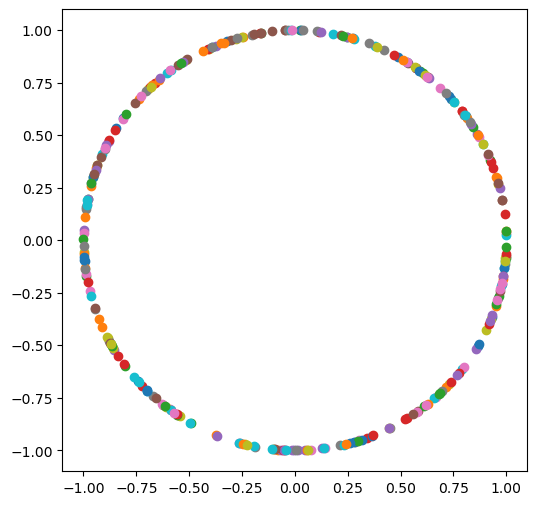

In [26]:
# Graficamos 300 puntos al azar en la circunferencia de radio 1
plt.figure(figsize=(6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    plt.scatter(np.cos(p), np.sin(p))

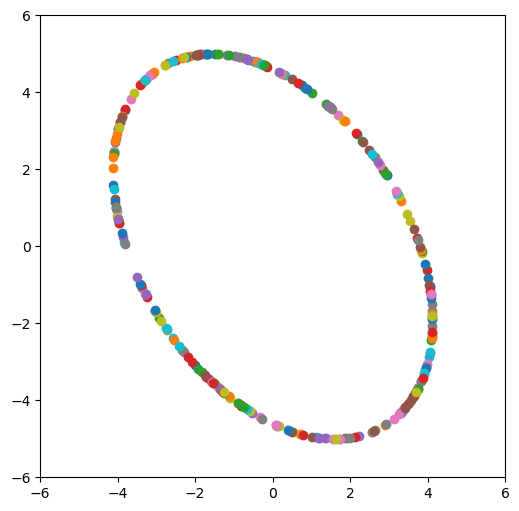

In [27]:
# Norma-2 para matrices simétricas
A = np.array([[1,4], [4,-3]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])
    

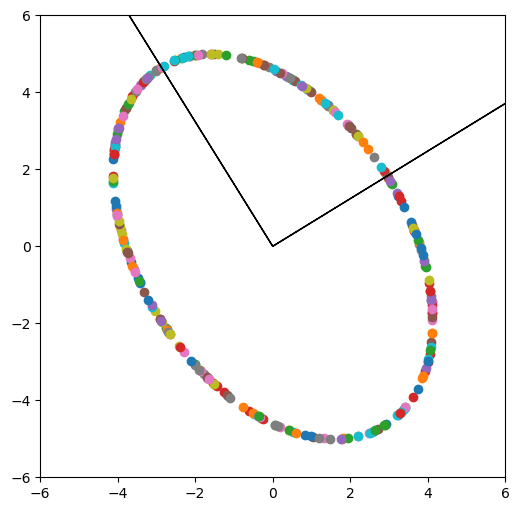

In [28]:
# Agregamos los autovectores de A

# Norma-2 para matrices simétricas
A = np.array([[1,4], [4,-3]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])

# Graficamos los autovectores de A
e = np.linalg.eig(A)
evec1 = e[1][0:2,0]*10
evec2 = e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])

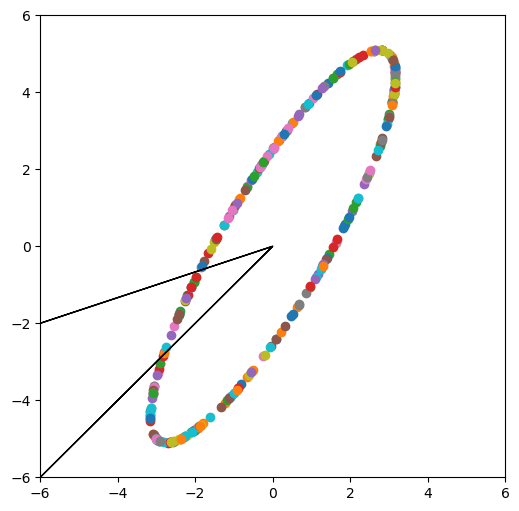

In [29]:
# Norma-2 para matrices en general
A = np.array([[1,3], [-1,5]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])
    
# Graficamos los autovectores de A
e = np.linalg.eig(A)
evec1 = e[1][0:2,0]*10
evec2 = e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])    

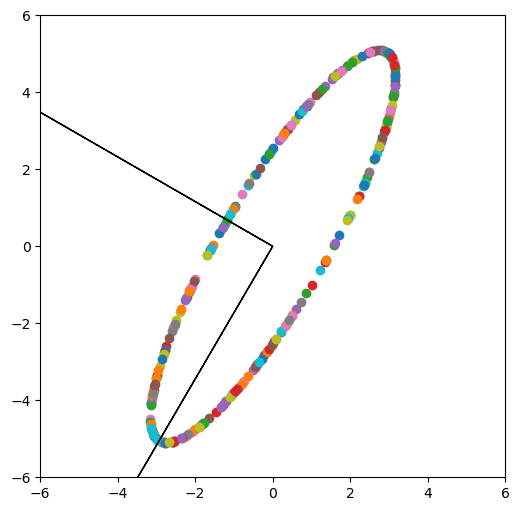

In [30]:
# Agregamos las imágenes de los autovectores de A.T @ A

# Norma-2
A = np.array([[1,3], [-1,5]])

# Tomamos 300 puntos al azar en la circunferencia y graficamos las imágenes
plt.figure(figsize=(6,6))
plt.xlim((-6,6))
plt.ylim((-6,6))
for i in range(300):
    p = np.random.rand()*2*np.pi
    v = np.array([np.cos(p), np.sin(p)])
    Av = A @ v
    plt.scatter(Av[0], Av[1])

# Graficamos las imágenes de los autovectores de A.T @ A
e = np.linalg.eig(A.T@A)
evec1 = A@e[1][0:2,0]*10
evec2 = A@e[1][0:2,1]*10

plt.arrow(0,0,evec1[0], evec1[1])
plt.arrow(0,0,evec2[0], evec2[1])
